## Step 1: Load CSV

Load CSV

In [132]:
%matplotlib inline


In [133]:
# --- Minimal loader for Telco datasets ---
from pathlib import Path
import pandas as pd

# 1) Point to your repo root (adjust only if your path is different)
ROOT = Path(r"C:\Users\miga\Documents\GitHub\Project_EDSB")
DATA_RAW = ROOT / "data" / "raw"
print("DATA_RAW:", DATA_RAW)

# 2) Files to load
files = {
    "demographics": "Telco_customer_churn_demographics.csv",
    "location":     "Telco_customer_churn_location.csv",
    "population":   "Telco_customer_churn_population.csv",
    "services":     "Telco_customer_churn_services.csv",
    "status":       "Telco_customer_churn_status.csv",
}

# 3) Read (auto-detects comma vs semicolon) + sanity checks
dfs = {}
for name, fname in files.items():
    path = DATA_RAW / fname
    if not path.exists():
        raise FileNotFoundError(f"Missing file: {path}")
    df = pd.read_csv(path, sep=None, engine="python", encoding="utf-8-sig")
    dfs[name] = df

# 4) Show shapes + full column names (short, no truncation)
for name, df in dfs.items():
    print(f"\n{name}: {df.shape}")
    print(df.columns.tolist())

# Optional: keep as variables for later steps
demographics = dfs["demographics"]
location     = dfs["location"]
population   = dfs["population"]
services     = dfs["services"]
status       = dfs["status"]





DATA_RAW: C:\Users\miga\Documents\GitHub\Project_EDSB\data\raw

demographics: (7043, 9)
['Customer ID', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents']

location: (7043, 9)
['Customer ID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude']

population: (1671, 3)
['ID', 'Zip Code', 'Population']

services: (7043, 30)
['Customer ID', 'Count', 'Quarter', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

status

## Step 2: Initial Data Exploration and Light Cleaning
- Let's explore each dataset individually first using pandas profiling 

In [121]:
%pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [122]:
# Set up reports folder

from pathlib import Path

# ROOT should already exist from your previous cell.
# If not, uncomment and set it:
# ROOT = Path(r"C:/Users/Miguel/Documents/GitHub/Project_EDS")

REPORTS_DIR = ROOT / "reports" / "profiling_raw_tables"
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

print("Reports will be saved to:", REPORTS_DIR)


Reports will be saved to: C:\Users\miga\Documents\GitHub\Project_EDSB\reports\profiling_raw_tables


In [123]:
# Generate YData Profiling reports for each raw table

from ydata_profiling import ProfileReport

def create_profile(df, name: str, output_dir: Path = REPORTS_DIR):
    """
    Generate a YData Profiling HTML report for a dataframe.
    """
    print(f"🔍 Creating profile for: {name} ...")
    profile = ProfileReport(
        df,
        title=f"Telco Customer Churn – {name} table",
        explorative=True,     # richer report
        minimal=False
    )
    output_path = output_dir / f"{name}_profiling.html"
    profile.to_file(output_path)
    print(f"✅ Saved: {output_path}\n")

# If dfs was created in Step 1, it should contain:
# 'demographics', 'location', 'population', 'services', 'status'
for name, df in dfs.items():
    create_profile(df, name)


🔍 Creating profile for: demographics ...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 102.32it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Saved: C:\Users\miga\Documents\GitHub\Project_EDSB\reports\profiling_raw_tables\demographics_profiling.html

🔍 Creating profile for: location ...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 47.80it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Saved: C:\Users\miga\Documents\GitHub\Project_EDSB\reports\profiling_raw_tables\location_profiling.html

🔍 Creating profile for: population ...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 187.58it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Saved: C:\Users\miga\Documents\GitHub\Project_EDSB\reports\profiling_raw_tables\population_profiling.html

🔍 Creating profile for: services ...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 375.36it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Saved: C:\Users\miga\Documents\GitHub\Project_EDSB\reports\profiling_raw_tables\services_profiling.html

🔍 Creating profile for: status ...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 152.66it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Saved: C:\Users\miga\Documents\GitHub\Project_EDSB\reports\profiling_raw_tables\status_profiling.html



2.1 Demographics table insights:
- No missing values, no duplicates, no constant columns.
- No pre-merge cleaning required.


2.2 Location table insights:
- Country and Count columns are constant.
- Lat Long is redundant because we already have Latitude & Longitude.
- We will convert Zip Code to string to ensure "1234" becomes "01234" if needed.
- We will drop columns "Lat Long", "Country" and "Count".




2.2.1 Location table pre-merge cleaninhg

In [136]:
# Helper to standardize column names
def standardize_columns(df):
    df = df.copy()
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
        .str.replace("/", "_")
    )
    return df


In [137]:
# Start from the raw location df in dfs
location = dfs["location"].copy()

# 1) Standardize column names
location = standardize_columns(location)
print("Location columns after standardize:", location.columns.tolist())

# 2) Drop unneeded columns IF they exist
cols_to_drop = [c for c in ["count", "lat_long", "country"] if c in location.columns]
location = location.drop(columns=cols_to_drop)
print("Dropped columns:", cols_to_drop)

# 3) Convert zip_code to 5-char string
if "zip_code" in location.columns:
    location["zip_code"] = (
        location["zip_code"]
        .astype(str)
        .str.zfill(5)
    )

location.head()


Location columns after standardize: ['customer_id', 'count', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude']
Dropped columns: ['count', 'lat_long', 'country']


,customer_id,state,city,zip_code,latitude,longitude
0,8779-QRDMV,California,Los Angeles,90022,34.023810,-118.156582
1,7495-OOKFY,California,Los Angeles,90063,34.044271,-118.185237
2,1658-BYGOY,California,Los Angeles,90065,34.108833,-118.229715
3,4598-XLKNJ,California,Inglewood,90303,33.936291,-118.332639
4,4846-WHAFZ,California,Whittier,90602,33.972119,-118.020188


2.3 Population Table insights: 
- No missing values, no duplicate rows, no obvious data quality alerts.
- We'll drop unneeded ID column as it is just an internal index and we have Zip Code to merge to the main table.
- We'll make sure Zip Code has the same format as in the location table (string, 5-digit, left-paded)
- Standardise column names

2.3.1 Population table pre-merging cleaning

In [138]:
# 2.2.2 Population table pre-merge cleaning

# 1) Inspect current structure (optional sanity check)
print(population.head())
print(population.info())

# 2) Drop unneeded technical ID column
if "ID" in population.columns:
    population = population.drop(columns=["ID"])

# 3) Ensure Zip Code is a 5-char string aligned with `location`
if "Zip Code" in population.columns:
    population["Zip Code"] = (
        population["Zip Code"]
        .astype(str)
        .str.zfill(5)
    )

# 4) Standardise column names
population = population.rename(
    columns={
        "Zip Code": "zip_code",
        "Population": "population"
    }
)

# 5) Quick check after cleaning
print(population.head())
print(population.describe(include="all"))


   ID  Zip Code  Population
0   1     90001       54492
1   2     90002       44586
2   3     90003       58198
3   4     90004       67852
4   5     90005       43019
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          1671 non-null   int64
 1   Zip Code    1671 non-null   int64
 2   Population  1671 non-null   int64
dtypes: int64(3)
memory usage: 39.3 KB
None
  zip_code  population
0    90001       54492
1    90002       44586
2    90003       58198
3    90004       67852
4    90005       43019
       zip_code     population
count      1671    1671.000000
unique     1671            NaN
top       90001            NaN
freq          1            NaN
mean        NaN   20276.384201
std         NaN   20689.117300
min         NaN      11.000000
25%         NaN    1789.000000
50%         NaN   14239.000000
75%         NaN   32942.500000
max     

2.4 Services Table insights:
- 55% of the Offer column values are missing.
- 21.7% of Internet Type column values are missing.


2.4.1 Services Table pre-merging cleaning

In [139]:
# 2.3 Services table pre-merge cleaning

# Start from raw services df
services = dfs["services"].copy()

# 1) Standardize column names
services = standardize_columns(services)
print("Services columns after standardize:", services.columns.tolist())

# 2) Drop unneeded columns
# - 'count' is just a counter
# - 'quarter' we will keep from status table instead
cols_to_drop = [c for c in ["count", "quarter"] if c in services.columns]
services = services.drop(columns=cols_to_drop)
print("Dropped columns from services:", cols_to_drop)

# 3) Ensure customer_id is string
if "customer_id" in services.columns:
    services["customer_id"] = services["customer_id"].astype(str)

# 4) Make sure numeric columns are really numeric
num_cols = [
    "number_of_referrals",
    "tenure_in_months",
    "avg_monthly_long_distance_charges",
    "avg_monthly_gb_download",
    "monthly_charge",
    "total_charges",
    "total_refunds",
    "total_extra_data_charges",
    "total_long_distance_charges",
]

for col in num_cols:
    if col in services.columns:
        services[col] = pd.to_numeric(services[col], errors="coerce")

# 5) Quick check
print("\nMissing values in key columns:")
cols_to_check = ["offer", "internet_type"] + num_cols
cols_to_check = [c for c in cols_to_check if c in services.columns]
print(services[cols_to_check].isna().sum())

services.head()



Services columns after standardize: ['customer_id', 'count', 'quarter', 'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service', 'avg_monthly_long_distance_charges', 'multiple_lines', 'internet_service', 'internet_type', 'avg_monthly_gb_download', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']
Dropped columns from services: ['count', 'quarter']

Missing values in key columns:
offer                                3877
internet_type                        1526
number_of_referrals                     0
tenure_in_months                        0
avg_monthly_long_distance_charges       0
avg_monthly_gb_download                 0
monthly_charge                          0
tot

,customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,DSL,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


2.5 Status Table Insights:
- Customer Status is one of the main target-like business variables, even though we might use "Churn Label" as the true target.
- Churn Label / Churn Category / Churn Reason / Churn Value / Churn Score / Satisfaction Score / CLTV are all strongly correlated with each other. That means there's a lot of redundancy and we might drop some of them to avoid leakage. 
- Churn Category and Churn Reason have 73.5% missing values each.

2.5.1 Statues Table pre-merging cleaning:

**Keep (for now):**
- Customer Status
- Churn Label (this is likely our main target)
- Churn Score
- Satisfaction Score
- CLTV
- Churn Value (we might later drop it if it’s just a numeric encoding of Churn Label)

**Flag but don’t immediately drop:**

- Churn Category, Churn Reason. Because they have 73% missing, we probably won’t use them in the final model, but I’d keep them through EDA just in case they help with business interpretation.

In [140]:
# 2.4 Status table pre-merge cleaning

# Start from raw status df
status = dfs["status"].copy()

# 1) Standardize column names
status = standardize_columns(status)
print("Status columns after standardize:", status.columns.tolist())

# 2) Drop unneeded columns (only 'count' in this table)
cols_to_drop = [c for c in ["count"] if c in status.columns]
status = status.drop(columns=cols_to_drop)
print("Dropped columns from status:", cols_to_drop)

# 3) Ensure customer_id is string
if "customer_id" in status.columns:
    status["customer_id"] = status["customer_id"].astype(str)

# 4) Make sure numeric fields are numeric (using snake_case names)
num_cols = ["churn_score", "cltv", "churn_value", "satisfaction_score"]
for col in num_cols:
    if col in status.columns:
        status[col] = pd.to_numeric(status[col], errors="coerce")

# 5) Quick sanity check
print("\nDtypes after cleaning:")
print(status.dtypes)

print("\nMissing values per column:")
print(status.isna().sum())

status.head()


Status columns after standardize: ['customer_id', 'count', 'quarter', 'satisfaction_score', 'customer_status', 'churn_label', 'churn_value', 'churn_score', 'cltv', 'churn_category', 'churn_reason']
Dropped columns from status: ['count']

Dtypes after cleaning:
customer_id           object
quarter               object
satisfaction_score     int64
customer_status       object
churn_label           object
churn_value            int64
churn_score            int64
cltv                   int64
churn_category        object
churn_reason          object
dtype: object

Missing values per column:
customer_id              0
quarter                  0
satisfaction_score       0
customer_status          0
churn_label              0
churn_value              0
churn_score              0
cltv                     0
churn_category        5174
churn_reason          5174
dtype: int64


,customer_id,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason
0,8779-QRDMV,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


## Step 3: Merging dataframes into unique dataframe and EDA of the new merged Dataset

3.1 Merging the 5 dataframes into a single dataframe

In [143]:
# Ensure consistent column names before merging
demographics = standardize_columns(demographics)
location      = standardize_columns(location)
services      = standardize_columns(services)
status        = standardize_columns(status)

# sanity check (optional)
for name, df_ in [
    ("demographics", demographics),
    ("location",    location),
    ("services",    services),
    ("status",      status),
]:
    print(name, "-> has customer_id?", "customer_id" in df_.columns)


demographics -> has customer_id? True
location -> has customer_id? True
services -> has customer_id? True
status -> has customer_id? True


In [144]:
# 3. Merge all Telco tables into one dataset

from pathlib import Path

# 1) Quick sanity check: unique customer_id in each table
for name, df_ in [
    ("demographics", demographics),
    ("location",     location),
    ("services",     services),
    ("status",       status),
]:
    n_rows = len(df_)
    n_cust = df_["customer_id"].nunique()
    print(f"{name:12s} -> rows: {n_rows:5d} | unique customer_id: {n_cust:5d}")

# 2) Merge step-by-step on customer_id
merged = (
    demographics
        .merge(location, on="customer_id", how="left", validate="one_to_one")
        .merge(services, on="customer_id", how="left", validate="one_to_one")
        .merge(status,   on="customer_id", how="left", validate="one_to_one")
)

print("\nShape after merging demo + loc + services + status:", merged.shape)

# 3) Bring in population via zip_code (many customers per zip_code)

if "zip_code" in merged.columns:
    # Ensure same dtype on both sides
    merged["zip_code"] = merged["zip_code"].astype(str).str.zfill(5)
    population["zip_code"] = population["zip_code"].astype(str).str.zfill(5)

    merged = merged.merge(
        population,
        on="zip_code",
        how="left",
        validate="many_to_one"
    )
    print("Shape after adding population:", merged.shape)
else:
    print("⚠️ zip_code not found in merged -> population not joined!")

# 3) Bring in population via zip_code (many customers per zip_code)
if "zip_code" in merged.columns:
    merged = merged.merge(
        population,
        on="zip_code",
        how="left",
        validate="many_to_one"
    )
    print("Shape after adding population:", merged.shape)
else:
    print("⚠️ zip_code not found in merged -> population not joined!")

# 4) Final checks
print("\nFinal columns:", len(merged.columns))
print("Any duplicated customer_id?", merged["customer_id"].duplicated().any())

print("\nMissing values (top 20 columns):")
print(merged.isna().sum().sort_values(ascending=False).head(20))

# 5) Save intermediate merged dataset
DATA_PROCESSED = ROOT / "data" / "processed"
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

output_path = DATA_PROCESSED / "telco_merged_step1.csv"
merged.to_csv(output_path, index=False)
print(f"\n✅ Saved merged dataset to: {output_path}")


demographics -> rows:  7043 | unique customer_id:  7043
location     -> rows:  7043 | unique customer_id:  7043
services     -> rows:  7043 | unique customer_id:  7043
status       -> rows:  7043 | unique customer_id:  7043

Shape after merging demo + loc + services + status: (7043, 50)
Shape after adding population: (7043, 51)
Shape after adding population: (7043, 52)

Final columns: 52
Any duplicated customer_id? False

Missing values (top 20 columns):
churn_reason                   5174
churn_category                 5174
offer                          3877
internet_type                  1526
customer_id                       0
total_refunds                     0
streaming_movies                  0
streaming_music                   0
unlimited_data                    0
contract                          0
paperless_billing                 0
payment_method                    0
monthly_charge                    0
total_charges                     0
total_long_distance_charges       0
t

3.2 Post-merge dataset cleaning

In [145]:
# 3.1 Load merged dataset for post-cleaning
import pandas as pd

df = merged.copy()   # since merged is already in memory from previous step

print("Shape:", df.shape)
df.head()


Shape: (7043, 52)


,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,state,...,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population_x,population_y
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,California,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,68701,68701
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,California,...,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,55668,55668
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,California,...,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,47534,47534
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,California,...,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,27778,27778
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,California,...,2,Churned,Yes,1,67,2793,Price,Extra data charges,26265,26265


In [146]:
# Overview of data types and missing values
print(df.info())
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   count                              7043 non-null   int64  
 2   gender                             7043 non-null   object 
 3   age                                7043 non-null   int64  
 4   under_30                           7043 non-null   object 
 5   senior_citizen                     7043 non-null   object 
 6   married                            7043 non-null   object 
 7   dependents                         7043 non-null   object 
 8   number_of_dependents               7043 non-null   int64  
 9   state                              7043 non-null   object 
 10  city                               7043 non-null   object 
 11  zip_code                           7043 non-null   objec

- Now we must remove leakage columns.
These columns contain information not available at the time of the prediciton. If we leve them the model will cheat and it will be useless. **Therefore we must drop:**

| Column            | Why drop it                                                      |
| ----------------- | ---------------------------------------------------------------- |
| `customer_status` | It literally tells you if customer stayed/churned/joined         |
| `churn_reason`    | Only known *after* churn                                         |
| `churn_category`  | Same as above                                                    |
| `quarter`         | Churn status may differ depending on quarter/order of data       |
| `cltv`            | Known after churn or after long tenure                           |
| `churn_value`     | Direct numeric encoding of churn/no churn in many Telco datasets |
| `churn_score`     | Often derived from churn models / internal scoring → leakage     |


We keep only:
- Churn lable, this is our true target. Yes/No --> to later convert into 1/0;


In [147]:
# 3.2 Remove target leakage columns
leakage_cols = [
    "customer_status",
    "churn_reason",
    "churn_category",
    "quarter",
    "cltv",
    "churn_value",
    "churn_score"
]

cols_to_drop = [c for c in leakage_cols if c in df.columns]
print("Dropping leakage columns:", cols_to_drop)

df = df.drop(columns=cols_to_drop)

print("New shape after dropping leakage columns:", df.shape)


Dropping leakage columns: ['customer_status', 'churn_reason', 'churn_category', 'quarter', 'cltv', 'churn_value', 'churn_score']
New shape after dropping leakage columns: (7043, 45)


- Create Target Variable (churn = 1 (Yes) /0 (No) )

In [148]:
# 3.3 Create binary churn target
df["churn"] = df["churn_label"].map({"Yes": 1, "No": 0})
df = df.drop(columns=["churn_label"])  # drop original label

df["churn"].value_counts(dropna=False)


churn
0    5174
1    1869
Name: count, dtype: int64

In [149]:
# 4.x One-hot encode categorical variables from the cleaned df

# 1) Identify categorical columns (strings + tenure_bucket)
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# We never encode customer_id
categorical_cols = [c for c in categorical_cols if c != "customer_id"]

print("Categorical columns:", categorical_cols)

# 2) One-hot encode
df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)

print("Encoded shape:", df_encoded.shape)
df_encoded.head()


Categorical columns: ['gender', 'under_30', 'senior_citizen', 'married', 'dependents', 'state', 'city', 'zip_code', 'referred_a_friend', 'offer', 'phone_service', 'multiple_lines', 'internet_service', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method']
Encoded shape: (7043, 2778)


,customer_id,count,age,number_of_dependents,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,...,premium_tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,streaming_music_Yes,unlimited_data_Yes,contract_One Year,contract_Two Year,paperless_billing_Yes,payment_method_Credit Card,payment_method_Mailed Check
0,8779-QRDMV,1,78,0,34.023810,-118.156582,0,1,0.00,8,...,False,False,True,False,False,False,False,True,False,False
1,7495-OOKFY,1,74,1,34.044271,-118.185237,1,8,48.85,17,...,False,False,False,False,True,False,False,True,True,False
2,1658-BYGOY,1,71,3,34.108833,-118.229715,0,18,11.33,52,...,False,True,True,True,True,False,False,True,False,False
3,4598-XLKNJ,1,78,1,33.936291,-118.332639,1,25,19.76,12,...,False,True,True,False,True,False,False,True,False,False
4,4846-WHAFZ,1,80,1,33.972119,-118.020188,1,37,6.33,14,...,False,False,False,False,True,False,False,True,False,False


In [150]:
# ===== RESET TO CLEANED MERGED DATASET =====
# Load the dataset AFTER merging, BEFORE leaking columns
df = pd.read_csv("C:/Users/miga/Documents/GitHub/Project_EDSB/data/processed/telco_merged_step1.csv")

print("Initial shape:", df.shape)
print("Initial columns:", df.columns.tolist())


# ===== REMOVE LEAKAGE COLUMNS =====
leakage_cols = [
    "customer_status", "churn_reason", "churn_category",
    "churn_score", "cltv", "quarter"
]

df = df.drop(columns=[c for c in leakage_cols if c in df.columns], errors="ignore")

print("\nAfter removing leakage:", df.shape)
print("Columns:", df.columns.tolist())


# ===== RECREATE CHURN TARGET =====
if "churn_label" in df.columns:
    df["churn"] = df["churn_label"].map({"Yes": 1, "No": 0})
    df = df.drop(columns=["churn_label"], errors="ignore")

print("\nAfter creating churn:", df.shape)
print("Columns:", df.columns.tolist())


# ===== DROP GEOGRAPHIC HIGH-CARDINALITY COLUMNS =====
for c in ["city", "zip_code", "state"]:
    if c in df.columns:
        df = df.drop(columns=[c])

print("\nAfter dropping geo:", df.shape)
print("Columns:", df.columns.tolist())


# ===== VERIFY THE CLEANED DATASET =====
print("\nFINAL CLEANED df SHAPE:", df.shape)
df.head()


Initial shape: (7043, 52)
Initial columns: ['customer_id', 'count', 'gender', 'age', 'under_30', 'senior_citizen', 'married', 'dependents', 'number_of_dependents', 'state', 'city', 'zip_code', 'latitude', 'longitude', 'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service', 'avg_monthly_long_distance_charges', 'multiple_lines', 'internet_service', 'internet_type', 'avg_monthly_gb_download', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'quarter', 'satisfaction_score', 'customer_status', 'churn_label', 'churn_value', 'churn_score', 'cltv', 'churn_category', 'churn_reason', 'population_x', 'population_y']

After removing leakage: (7043, 46)
Columns: ['customer_id', 'co

,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,latitude,...,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,churn_value,population_x,population_y,churn
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,34.023810,...,39.65,0.00,20,0.00,59.65,3,1,68701,68701,1
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,34.044271,...,633.30,0.00,0,390.80,1024.10,3,1,55668,55668,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,34.108833,...,1752.55,45.61,0,203.94,1910.88,2,1,47534,47534,1
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,33.936291,...,2514.50,13.43,0,494.00,2995.07,2,1,27778,27778,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,33.972119,...,2868.15,0.00,0,234.21,3102.36,2,1,26265,26265,1


In [151]:
# Final overview of cleaned dataset
print("Number of columns:", len(df.columns))
df.columns.tolist()


Number of columns: 43


['customer_id',
 'count',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'dependents',
 'number_of_dependents',
 'latitude',
 'longitude',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'satisfaction_score',
 'churn_value',
 'population_x',
 'population_y',
 'churn']

- At this point, our dataset is clean of leakage and ready for EDA & Feature Engineering

3.3 Post-merge EDA:



3.3.1 Missing Values Heatmap, Churn distribution and Numerical vs Categorical split

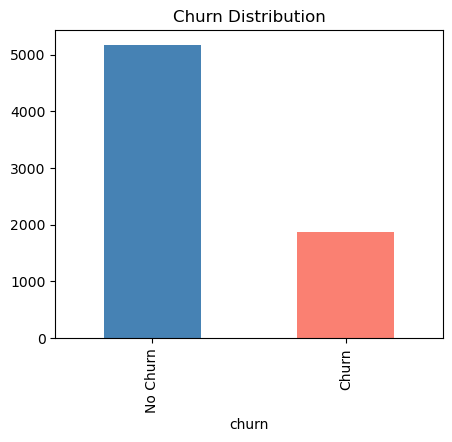

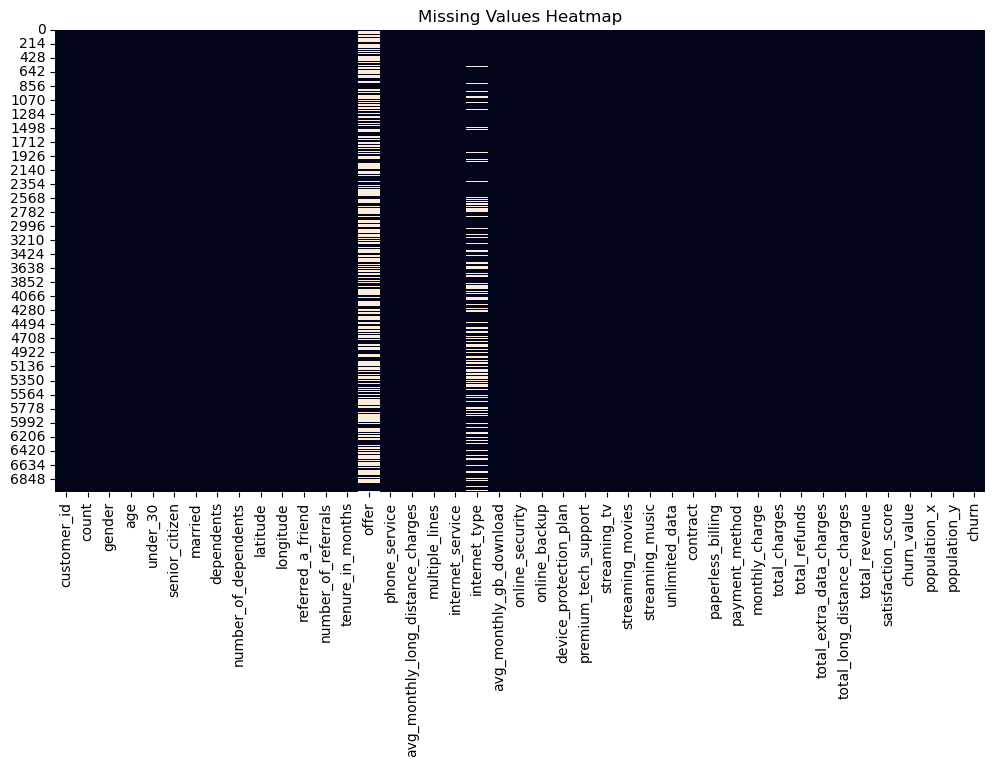

Numeric columns: 20
['count', 'age', 'number_of_dependents', 'latitude', 'longitude', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_long_distance_charges', 'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'satisfaction_score', 'churn_value', 'population_x', 'population_y', 'churn']

Categorical columns: 23
['customer_id', 'gender', 'under_30', 'senior_citizen', 'married', 'dependents', 'referred_a_friend', 'offer', 'phone_service', 'multiple_lines', 'internet_service', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method']


In [152]:
# 4.1 Basic EDA: overview

import seaborn as sns
import matplotlib.pyplot as plt

# 1) Churn distribution
plt.figure(figsize=(5,4))
df["churn"].value_counts().plot(kind="bar", color=["steelblue", "salmon"])
plt.title("Churn Distribution")
plt.xticks([0, 1], ["No Churn", "Churn"])
plt.show()

# 2) Missing value heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# 3) Identify numeric vs categorical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric columns:", len(numeric_cols))
print(numeric_cols)
print("\nCategorical columns:", len(categorical_cols))
print(categorical_cols)


- We have 18 numerical columns and 26 categorical columns

3.3.2 Churn rate by categorical variables

In [153]:
import warnings
warnings.filterwarnings("ignore")


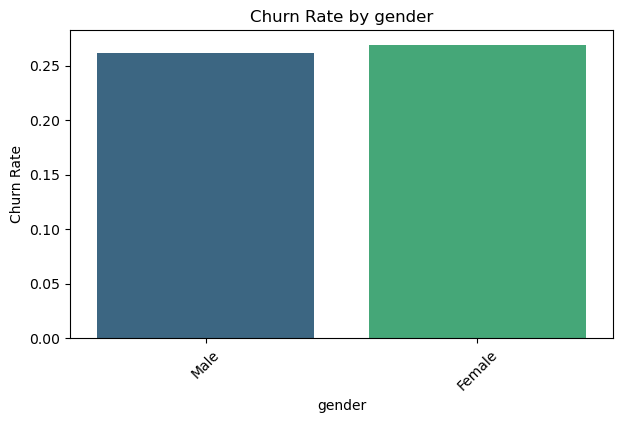

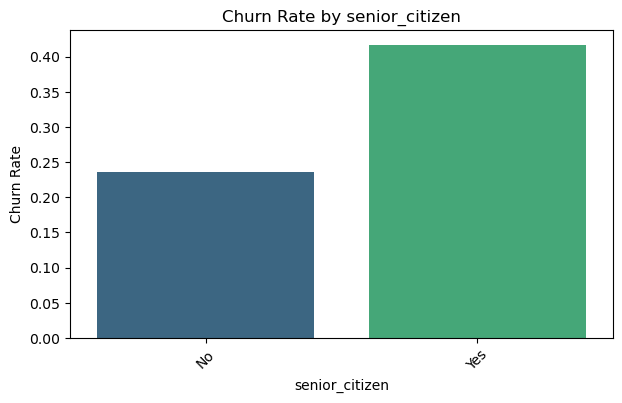

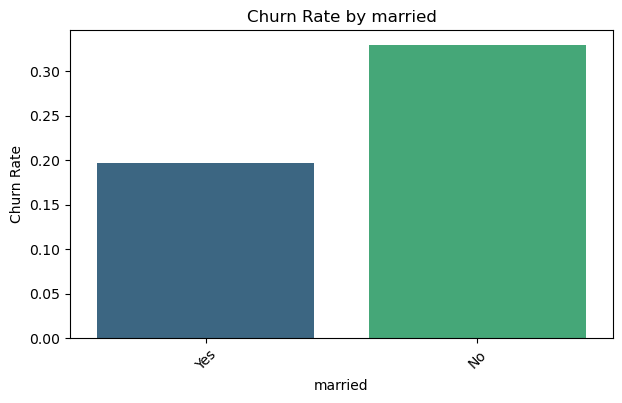

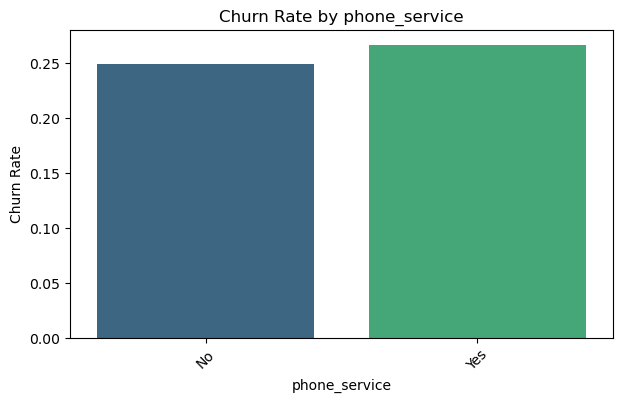

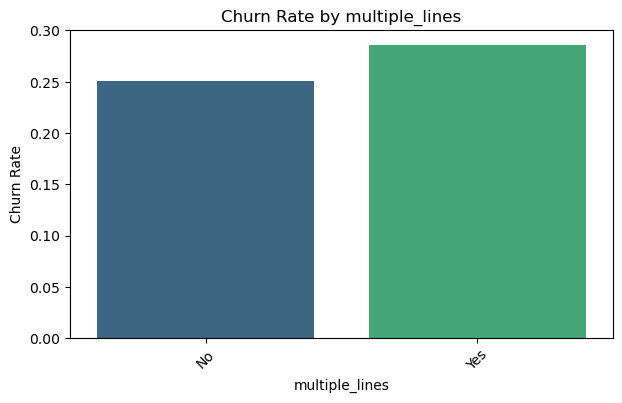

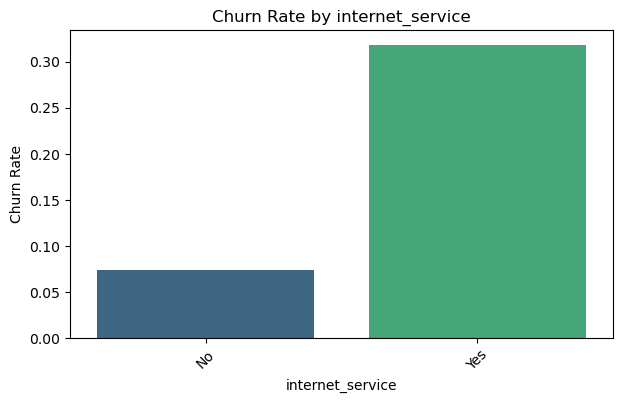

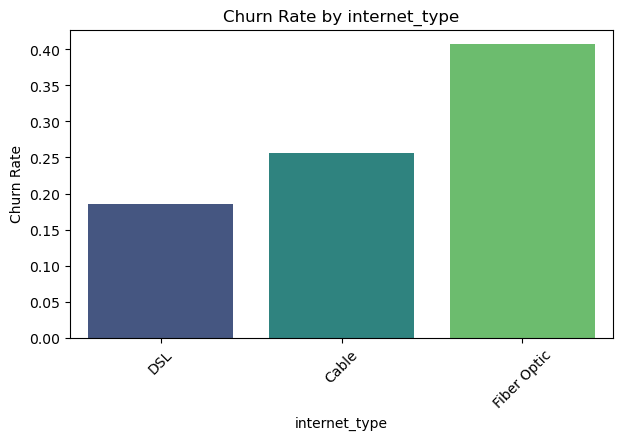

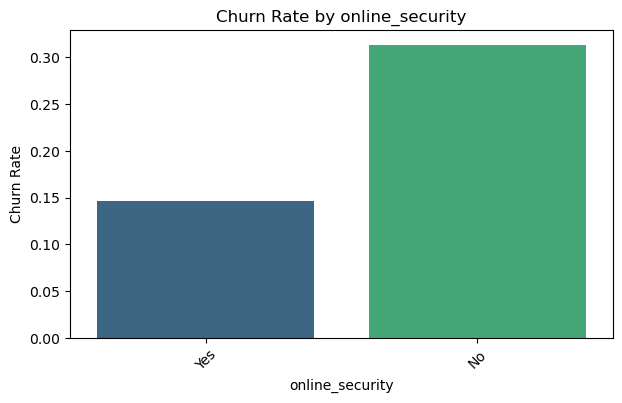

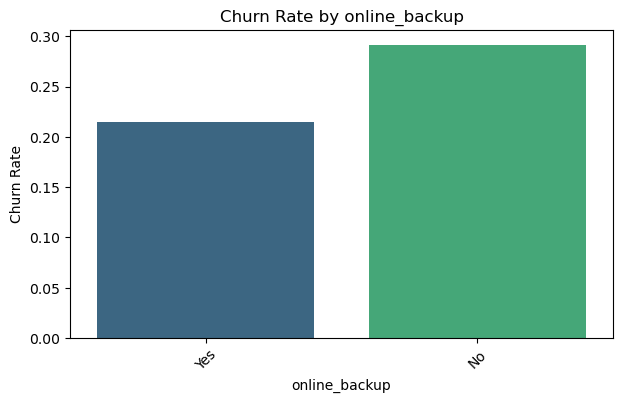

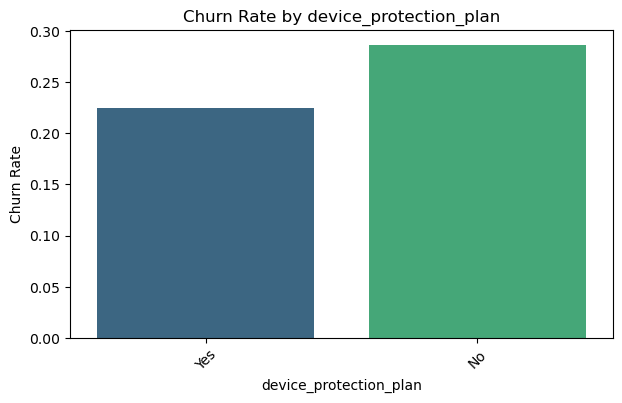

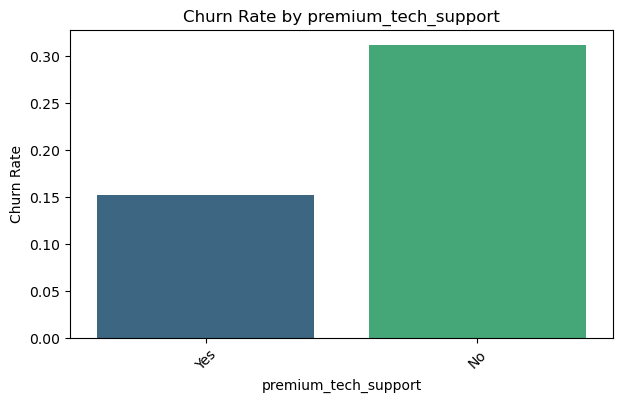

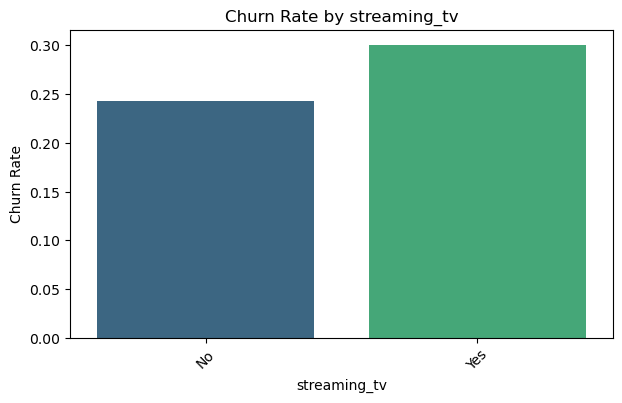

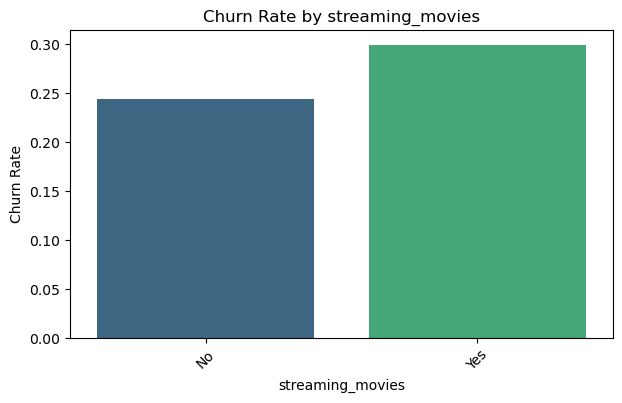

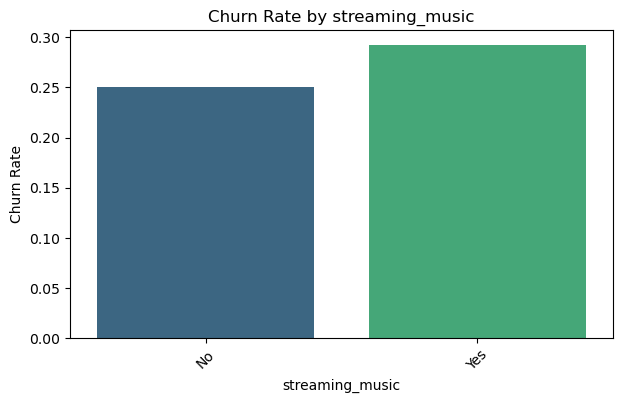

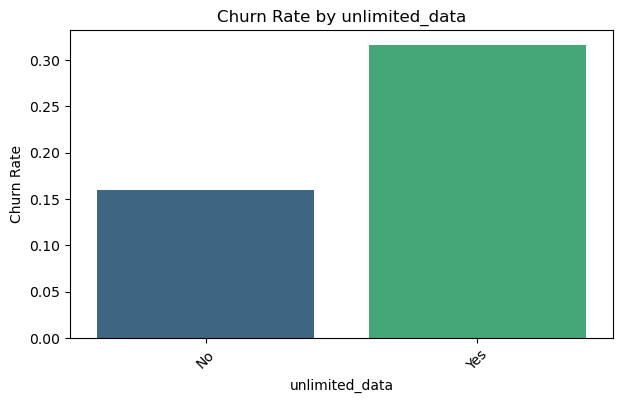

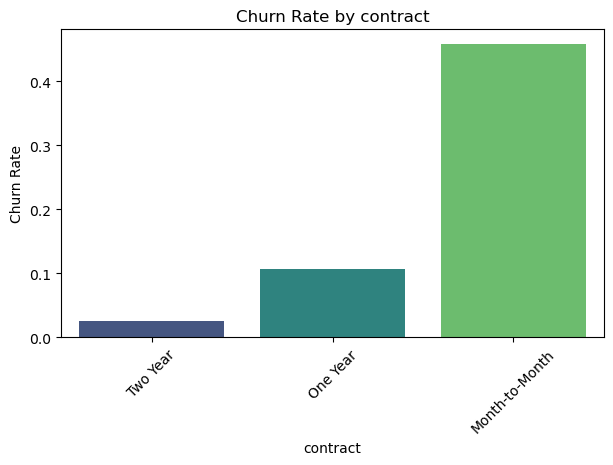

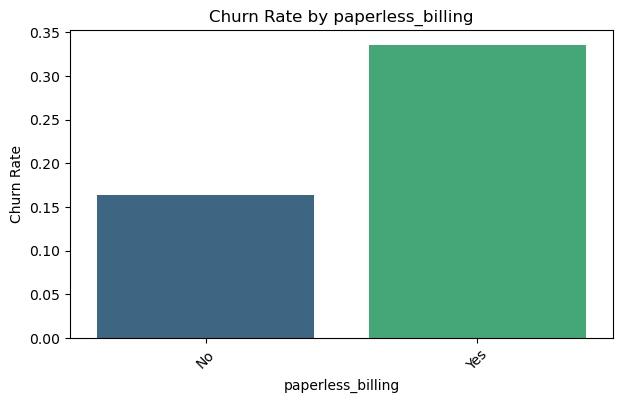

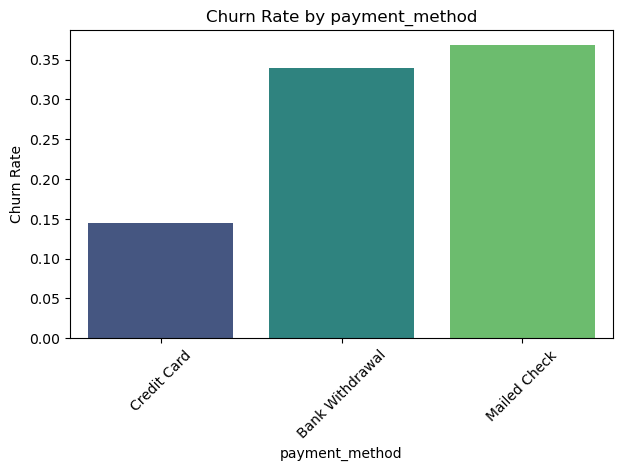

In [ ]:
# 4.3 Churn rate by categorical features

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

cat_features_to_plot = [
    "gender",
    "senior_citizen",
    "married",
    "phone_service",
    "multiple_lines",
    "internet_service",
    "internet_type",
    "online_security",
    "online_backup",
    "device_protection_plan",
    "premium_tech_support",
    "streaming_tv",
    "streaming_movies",
    "streaming_music",
    "unlimited_data",
    "contract",
    "paperless_billing",
    "payment_method",
]

for col in cat_features_to_plot:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        churn_rate = df.groupby(col)["churn"].mean().sort_values()
        sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")
        plt.title(f"Churn Rate by {col}")
        plt.ylabel("Churn Rate")
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.show()


- **Churn by categorical variables Key Insights:**

High Impact Variables:

**Contract Type:**

By far the strongest categorical driver.

Month-to-month customers have very high churn (~40%)

One-year contracts have low churn (~10%)

Two-year contracts have almost zero churn (~5%)

Interpretation: The lack of contract commitment strongly predicts churn.
Business action: Incentivize contract renewal, bundling, loyalty discounts.

-------------------------------------------------------------------------------------

**Internet Type / Internet Service:**

Fiber Optic customers churn the most (~40%)

Cable has medium churn

DSL has the lowest churn

Indicates service quality issues in Fiber or competitive pressure.


-------------------------------------------------------------------------------------

**Security & Support Add-ons**

Highly predictive:

Customers without Online Security churn significantly more

Customers without Tech Support churn significantly more

Same pattern with Online Backup, Device Protection, etc.

These add-ons are retention protectors.
Customers without them are higher risk.

Business implication: Offer discounts or free trials of security/support features to high-risk segments.


-------------------------------------------------------------------------------------

**Payment Method**

Mailed check and bank withdrawal churn the most (~35–40%)

Credit card has the lowest churn (~15%)

Suggests customers using “modern & automatic” payment methods are more stable.

Encourage switching to credit card or auto-pay.


-------------------------------------------------------------------------------------

**Paperless Billing**

Paperless billing = higher churn

Non-paperless billing = lower churn

This is often linked to:

month-to-month subscription overlaps

digital engagement risk

customers who are “less tied” to the company

**Summary:**

Churn is primarily driven by service commitment, internet technology, and the presence of support/security add-ons.
Month-to-month customers, fiber optic users, and customers lacking security or tech-support services exhibit the highest churn rates.
Payment mode and digital engagement behaviors (paperless billing) also correlate strongly with higher churn.
Less impactful variables include gender, phone service, and marital status.

**Strong predictors — KEEP and use in modeling:**

- contract

- internet_type / internet_service

- online_security

- premium_tech_support

- online_backup

- device_protection_plan

- payment_method

- paperless_billing

- senior_citizen

- unlimited_data

- streaming_* features

- tenure_in_months (numeric but critical)

**Weak predictors — LOW priority:**

- gender

- married

- dependents

- referred_a_friend



3.3.3 Churn Vs Tenure & Monthly Charges 

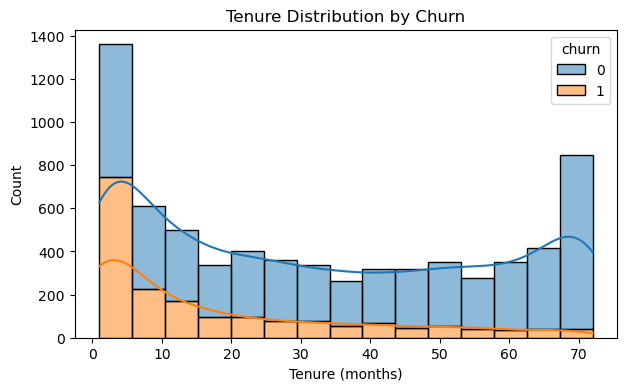

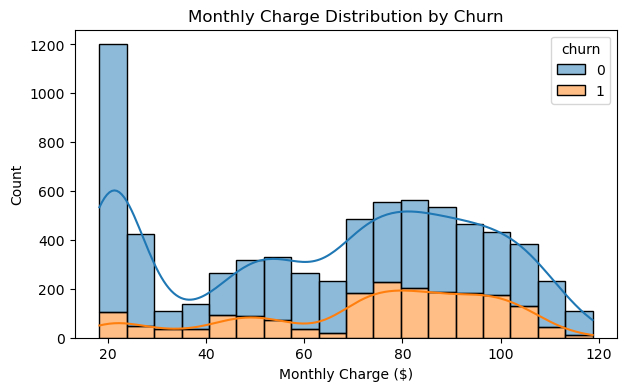

In [154]:
# 4.4 Churn vs numeric drivers

import seaborn as sns
import matplotlib.pyplot as plt

# TENURE vs CHURN
plt.figure(figsize=(7,4))
sns.histplot(data=df, x="tenure_in_months", hue="churn", kde=True, multiple="stack")
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

# MONTHLY CHARGE vs CHURN
plt.figure(figsize=(7,4))
sns.histplot(data=df, x="monthly_charge", hue="churn", kde=True, multiple="stack")
plt.title("Monthly Charge Distribution by Churn")
plt.xlabel("Monthly Charge ($)")
plt.ylabel("Count")
plt.show()


**Key Insights:**

**Tenure**

Early lifecycle churn spike → onboarding problem

Long-tenure customers stable → no need to spend retention budget here

Main risk zone: first 90 days

**Monthly Charges**

High-paying customers churn more → price-performance dissatisfaction

Mid-range customers most loyal

Low-paying customers stable legacy users

**Interaction**

The most critical churn profile is:
Fiber + High charges + No security/tech support + Low tenure

This is out high-value, high-risk customer segment.



3.3.4 Numerical Relationships - Correlation Heatmap

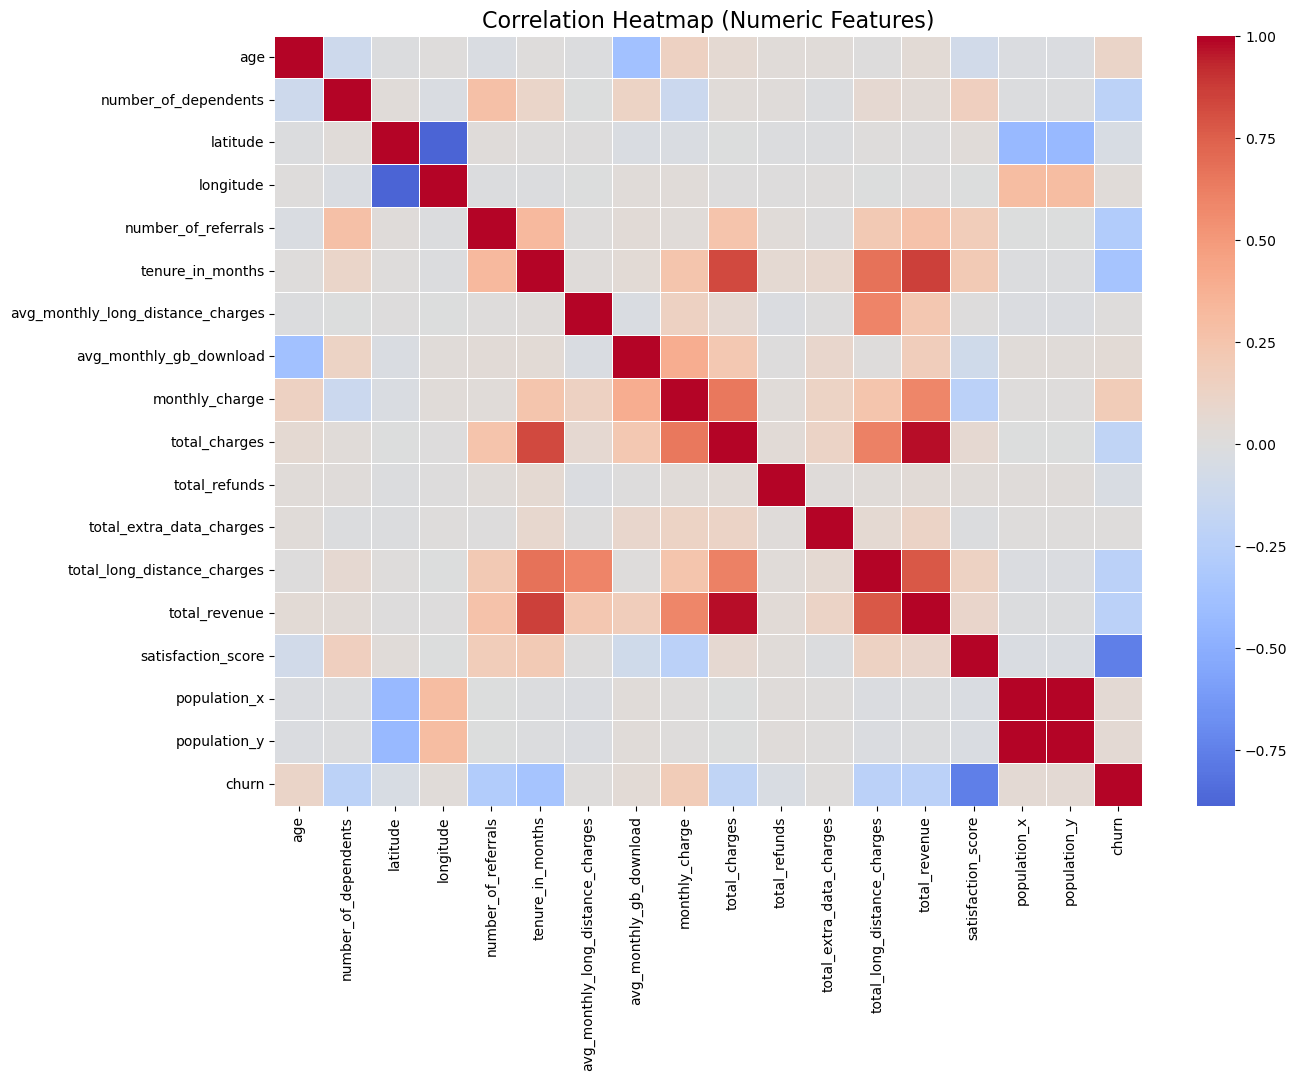

In [ ]:
# 4.5 Correlation heatmap (numeric features only)

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(14,10))
corr = numeric_df.corr()

sns.heatmap(
    corr,
    annot=False,
    cmap="coolwarm",
    center=0,
    linewidths=.5
)

plt.title("Correlation Heatmap (Numeric Features)", fontsize=16)
plt.show()


**Key Insights summary:** 

The correlation heatmap shows that churn has weak direct linear relationships with numerical features, which is expected in telecom churn problems.
However, tenure and satisfaction score show meaningful negative correlations with churn, while higher monthly charges show a slight positive correlation.
Strong correlations among total charges, tenure, and revenue indicate multicollinearity, which tree-based models can handle naturally.
Geographic and demographic numeric features contribute limited predictive value.
Overall, churn is driven by non-linear interactions rather than single variables, reinforcing the need for tree-based or ensemble models.

## 1. Share of total revenue from Month-to-Month contracts

In [156]:
# Exact match
mtm_mask = df['contract'] == "Month-to-Month"

mtm_rev = df.loc[mtm_mask, 'total_revenue'].sum()
mtm_share = mtm_rev / total_rev

print(f"Total revenue: {total_rev:,.2f}")
print(f"Month-to-Month revenue: {mtm_rev:,.2f}")
print(f"Month-to-Month share of total revenue: {mtm_share:.2%}")



Total revenue: 21,371,131.69
Month-to-Month revenue: 6,162,488.22
Month-to-Month share of total revenue: 28.84%


## 2. Share of Revenue by contract Type



In [157]:
# Revenue by contract type
rev_by_contract = (
    df.groupby('contract')['total_revenue']
      .sum()
      .sort_values(ascending=False)
)

# Share of total revenue
rev_share = (rev_by_contract / total_rev * 100).round(2)

print("Revenue by contract type:\n")
print(pd.DataFrame({
    "Revenue": rev_by_contract.map(lambda x: f"{x:,.2f}"),
    "Share (%)": rev_share
}))


Revenue by contract type:

                     Revenue  Share (%)
contract                               
Two Year        9,036,849.16      42.29
One Year        6,171,794.31      28.88
Month-to-Month  6,162,488.22      28.84


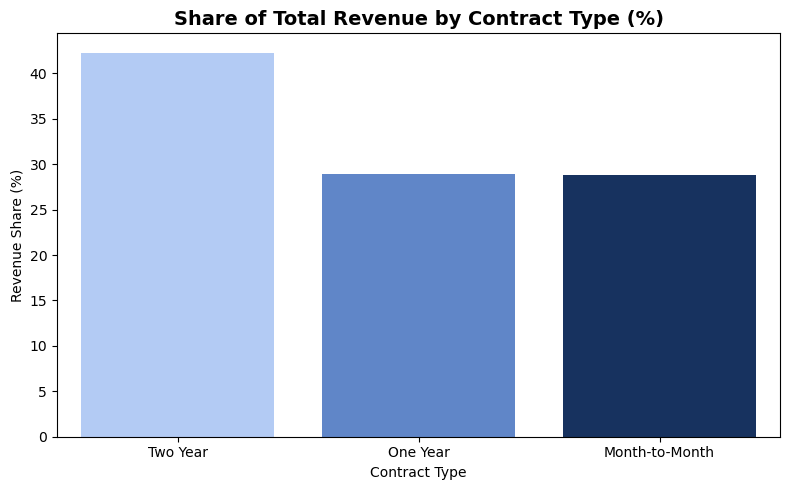

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
rev_by_contract = (
    df.groupby('contract')['total_revenue']
    .sum()
    .sort_values(ascending=False)
)

rev_share = (rev_by_contract / rev_by_contract.sum() * 100).round(2)

rev_df = rev_share.reset_index()
rev_df.columns = ['contract', 'share']

# Blue palette
colors = ["#a8c8ff", "#4f81d9", "#0b2f6b"]

plt.figure(figsize=(8,5))
sns.barplot(
    data=rev_df,
    x='contract',
    y='share',
    palette=colors
)

plt.title("Share of Total Revenue by Contract Type (%)", fontsize=14, weight="bold")
plt.xlabel("Contract Type")
plt.ylabel("Revenue Share (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 3. Average total revenue per customer grouped by contract type (lifetime revenue)

In [158]:
avg_total_rev = df.groupby('contract')['total_revenue'].mean().round(2)

print("Average TOTAL revenue per customer:")
print(avg_total_rev)


Average TOTAL revenue per customer:
contract
Month-to-Month    1707.06
One Year          3981.80
Two Year          4799.18
Name: total_revenue, dtype: float64


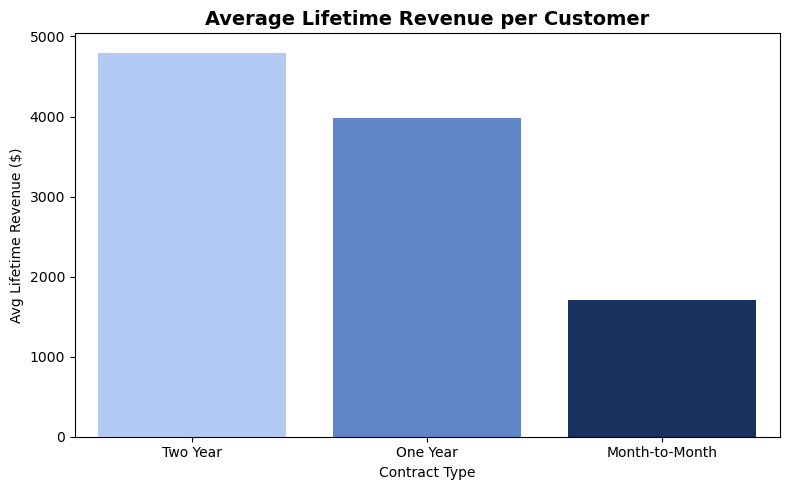

In [164]:
# Compute average lifetime revenue
avg_total_rev = (
    df.groupby('contract')['total_revenue']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

avg_df = avg_total_rev.reset_index()
avg_df.columns = ['contract', 'avg_lifetime_rev']

plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_df,
    x='contract',
    y='avg_lifetime_rev',
    palette=colors
)

plt.title("Average Lifetime Revenue per Customer", fontsize=14, weight="bold")
plt.xlabel("Contract Type")
plt.ylabel("Avg Lifetime Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 3.1 Percentage of Month-to-Month customers that Churn vs non-churn

In [187]:
# Filter for month-to-month customers
mtm = df[df['contract'] == 'Month-to-Month']

# Count churned and non-churned
churn_counts = mtm['churn'].value_counts()

non_churn = churn_counts.get(0, 0)
churn = churn_counts.get(1, 0)
total = non_churn + churn

# Percentages
non_churn_pct = non_churn / total * 100
churn_pct = churn / total * 100

print(f"Month-to-Month customers total: {total}")
print(f"Non-Churned: {non_churn} ({non_churn_pct:.2f}%)")
print(f"Churned:     {churn} ({churn_pct:.2f}%)")


Month-to-Month customers total: 3610
Non-Churned: 1955 (54.16%)
Churned:     1655 (45.84%)


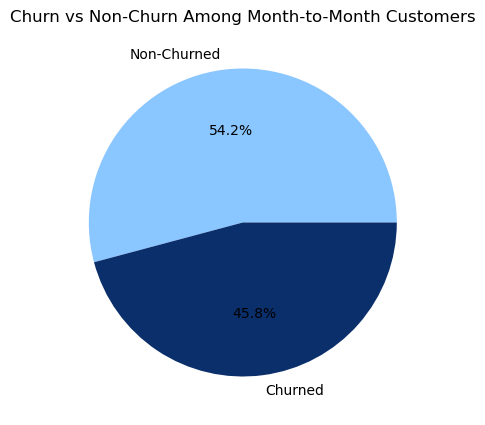

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.pie(
    [non_churn, churn],
    labels=["Non-Churned", "Churned"],
    autopct="%.1f%%",
    colors=["#8ac6ff", "#0b2f6b"]
)
plt.title("Churn vs Non-Churn Among Month-to-Month Customers")
plt.show()


## 3.2 Average Monthly Revenue per Customer by Contract Type

In [159]:
# Avoid division by zero
df['avg_monthly_rev'] = df['total_revenue'] / df['tenure_in_months'].replace(0, 1)

avg_monthly_rev = df.groupby('contract')['avg_monthly_rev'].mean().round(2)

print("Average MONTHLY revenue per customer:")
print(avg_monthly_rev)


Average MONTHLY revenue per customer:
contract
Month-to-Month    89.04
One Year          89.61
Two Year          85.12
Name: avg_monthly_rev, dtype: float64


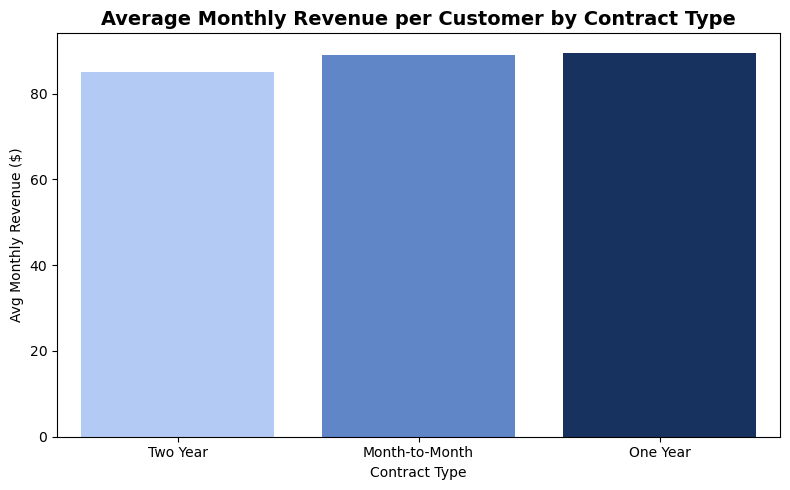

In [ ]:
# Create monthly revenue
df["avg_monthly_rev"] = df["total_revenue"] / df["tenure_in_months"].replace(0,1)

# Compute average monthly revenue
avg_monthly_rev = df.groupby("contract")["avg_monthly_rev"].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(
    x=avg_monthly_rev.index,
    y=avg_monthly_rev.values,
    palette=colors
)

plt.title("Average Monthly Revenue per Customer by Contract Type", fontsize=14, weight='bold')
plt.ylabel("Avg Monthly Revenue ($)")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 3.2.1 Average monthly Revenue of month-to-month non-churned vs churned customer

In [168]:
# Filter Month-to-Month customers only
mtm = df[df["contract"] == "Month-to-Month"]

# Group by churn status
avg_monthly_rev = (
    mtm.groupby("churn")["monthly_charge"]
    .mean()
    .rename({0: "Non-Churned", 1: "Churned"})
)

avg_monthly_rev


churn
Non-Churned    59.293632
Churned        73.019396
Name: monthly_charge, dtype: float64

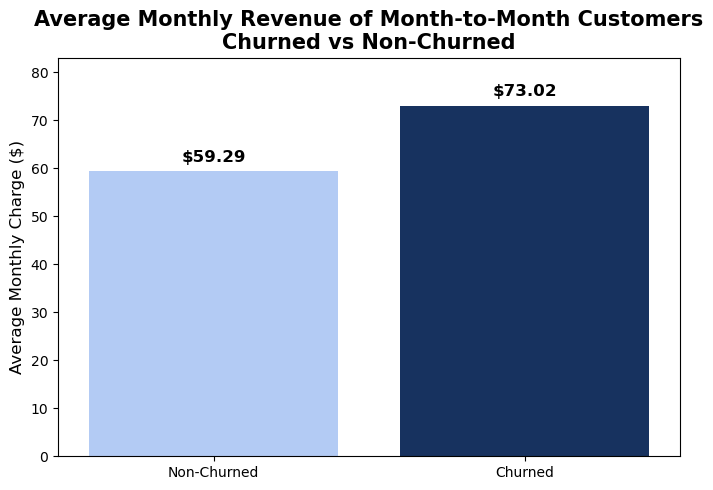

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colors: light blue (non-churned) → dark blue (churned)
colors = ["#a8c8ff", "#0b2f6b"]

plt.figure(figsize=(7,5))

sns.barplot(
    x=avg_monthly_rev.index,
    y=avg_monthly_rev.values,
    palette=colors
)

plt.title("Average Monthly Revenue of Month-to-Month Customers\nChurned vs Non-Churned",
          fontsize=15, weight="bold")

plt.xlabel("")
plt.ylabel("Average Monthly Charge ($)", fontsize=12)

# Increase y-axis limit so labels don't touch top
max_val = avg_monthly_rev.values.max()
plt.ylim(0, max_val + 10)   # <-- added padding above the tallest bar

# Add numbers on top of bars (higher vertical offset)
for i, v in enumerate(avg_monthly_rev.values):
    plt.text(i, v + 2, f"${v:.2f}", 
             ha='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()


# 3.2.2 Month-to-Month Churned customer services vs Services of Month-to-month non-churned customers

## 3.2.2.1 Month-to-Month churned customers vs Month-to-Month non-churned customers services' usage 

In [183]:
# Filter month-to-month customers
mtm = df[df["contract"] == "Month-to-Month"].copy()

# Total number of MTM customers
total_mtm = len(mtm)

# Convert churn values to readable labels
mtm["churn_label2"] = mtm["churn"].map({1: "Churned", 0: "Non-Churned"})

# List of service columns
service_cols = [
    "internet_service", "phone_service", "unlimited_data", "multiple_lines",
    "streaming_tv", "streaming_movies", "streaming_music",
    "device_protection_plan", "online_backup", "online_security",
    "premium_tech_support"
]

# Calculate percentages
service_percent = {}

for col in service_cols:
    users = mtm[mtm[col] == "Yes"]
    pct = (
        users.groupby("churn_label2").size() / total_mtm * 100
    ).reindex(["Non-Churned", "Churned"], fill_value=0)
    service_percent[col] = pct

service_percent = pd.DataFrame(service_percent).T
service_percent.index.name = "Service"

service_percent


churn_label2,Non-Churned,Churned
Service,,
internet_service,42.548476,43.102493
phone_service,48.642659,41.606648
unlimited_data,36.343490,36.925208
multiple_lines,17.313019,20.000000
streaming_tv,14.681440,18.199446
streaming_movies,14.626039,18.171745
streaming_music,14.958449,16.204986
device_protection_plan,12.409972,11.551247
online_backup,15.401662,11.218837


<Figure size 1200x700 with 0 Axes>

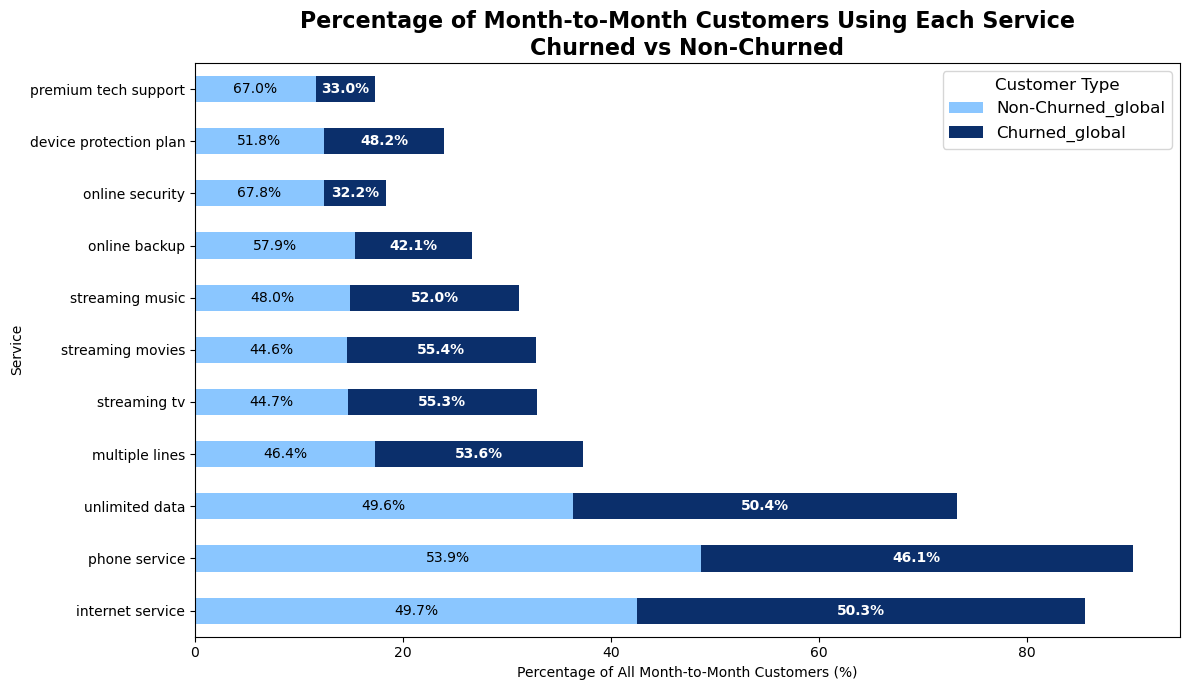

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

services_cols = [
    'internet_service', 'phone_service', 'unlimited_data', 'multiple_lines',
    'streaming_tv', 'streaming_movies', 'streaming_music', 'online_backup',
    'online_security', 'device_protection_plan', 'premium_tech_support'
]

# Filter to Month-to-Month customers only
mtm = df[df['contract'] == 'Month-to-Month'].copy()
n_mtm = len(mtm)

rows = []
for srv in services_cols:
    # Customers who have this service
    subset = mtm[mtm[srv] == 'Yes']
    total_srv = len(subset)

    if total_srv == 0:
        continue

    non_cnt = (subset['churn'] == 0).sum()
    ch_cnt  = (subset['churn'] == 1).sum()

    # 1) GLOBAL percentages (for bar lengths – same as before)
    non_global = non_cnt / n_mtm * 100
    ch_global  = ch_cnt  / n_mtm * 100

    # 2) WITHIN-SERVICE percentages (for labels – sum to 100%)
    non_within = non_cnt / total_srv * 100
    ch_within  = ch_cnt  / total_srv * 100

    rows.append({
        "service": srv.replace('_', ' '),
        "Non-Churned_global": non_global,
        "Churned_global": ch_global,
        "Non-Churned_within": non_within,
        "Churned_within": ch_within
    })

plot_df = pd.DataFrame(rows).set_index("service")

# ---- Plot (same axes as your previous chart) ----
plt.figure(figsize=(12, 7))
colors = ["#8ac6ff", "#0b2f6b"]  # light blue, dark blue

ax = plot_df[["Non-Churned_global", "Churned_global"]].plot(
    kind="barh",
    stacked=True,
    color=colors,
    edgecolor="none",
    figsize=(12, 7)
)

# Add WITHIN-service percentages as text inside bars
for i, svc in enumerate(plot_df.index):
    non_len   = plot_df.loc[svc, "Non-Churned_global"]
    ch_len    = plot_df.loc[svc, "Churned_global"]
    non_with  = plot_df.loc[svc, "Non-Churned_within"]
    ch_with   = plot_df.loc[svc, "Churned_within"]

    # Non-churn label (left segment)
    if non_len > 0:
        ax.text(
            non_len / 2, i,
            f"{non_with:.1f}%",
            ha="center", va="center",
            color="black", fontsize=10
        )

    # Churn label (right segment)
    if ch_len > 0:
        ax.text(
            non_len + ch_len / 2, i,
            f"{ch_with:.1f}%",
            ha="center", va="center",
            color="white", fontsize=10, fontweight="bold"
        )

# Cosmetics (same axes meaning as before)
plt.title(
    "Percentage of Month-to-Month Customers Using Each Service\n"
    "Churned vs Non-Churned",
    fontsize=16, weight="bold"
)
plt.xlabel("Percentage of All Month-to-Month Customers (%)")
plt.ylabel("Service")

plt.legend(
    title="Customer Type",
    fontsize=12,
    title_fontsize=12,
    loc="upper right",
    facecolor="white"
)

plt.tight_layout()
plt.show()


## 3.2.3 Month-To-Month Service Bundles associated with High-Churn and Low Churn

In [189]:
mtm = df[df["contract"] == "Month-to-Month"].copy()


In [190]:
service_cols = [
    "internet_service", "phone_service", "unlimited_data",
    "multiple_lines", "streaming_tv", "streaming_movies", "streaming_music",
    "device_protection_plan", "online_backup", "premium_tech_support",
    "online_security"
]


In [195]:
def combine_services(row):
    active_services = []
    
    for col in service_cols:
        val = row[col]

        # Treat service as active when not a "No" category
        if isinstance(val, str):
            if val.lower() not in ["no", "no internet service", "no phone service"]:
                active_services.append(col)
        else:
            # fallback for numeric (not expected here)
            if val == 1:
                active_services.append(col)

    if not active_services:
        return "No services"
    
    return " + ".join(active_services)

mtm["service_combo"] = mtm[service_cols].apply(combine_services, axis=1)


In [196]:
combo_stats = (
    mtm.groupby("service_combo")["churn"]
    .agg(["mean", "count"])
    .rename(columns={"mean": "churn_rate", "count": "customers"})
    .sort_values("churn_rate", ascending=False)
)


In [197]:
high_churn = combo_stats[combo_stats["customers"] >= 25].head(10)
high_churn


,churn_rate,customers
service_combo,,
internet_service + phone_service + unlimited_data + multiple_lines + streaming_movies + streaming_music,0.750000,48
internet_service + phone_service + unlimited_data + multiple_lines + streaming_tv + streaming_movies + streaming_music,0.721311,61
internet_service + phone_service + unlimited_data + multiple_lines + streaming_tv + streaming_movies + streaming_music + device_protection_plan,0.697674,43
internet_service + phone_service + unlimited_data + multiple_lines + streaming_tv,0.650000,40
internet_service + phone_service + unlimited_data + streaming_tv + streaming_movies + streaming_music,0.647059,51
internet_service + phone_service + unlimited_data + streaming_tv,0.630769,65
internet_service + phone_service + unlimited_data + streaming_movies + streaming_music,0.622642,53
internet_service + phone_service + unlimited_data + multiple_lines + streaming_tv + streaming_movies + streaming_music + device_protection_plan + online_backup,0.608696,46
internet_service + phone_service + unlimited_data + multiple_lines + streaming_tv + streaming_movies + streaming_music + online_backup,0.605263,38


In [198]:
low_churn = combo_stats[combo_stats["customers"] >= 25].tail(10)
low_churn


,churn_rate,customers
service_combo,,
internet_service + phone_service,0.470588,51
internet_service + phone_service + unlimited_data + multiple_lines + online_backup,0.464286,56
internet_service + phone_service + unlimited_data + online_backup,0.424242,66
internet_service + phone_service + unlimited_data + multiple_lines + online_security,0.419355,31
internet_service + unlimited_data + online_backup,0.400000,25
internet_service + phone_service + unlimited_data + premium_tech_support,0.317073,41
internet_service + phone_service + unlimited_data + online_security,0.304348,69
internet_service + phone_service + unlimited_data + online_backup + online_security,0.296296,27
phone_service,0.199153,472


- Top 10 High-Churn Bundles

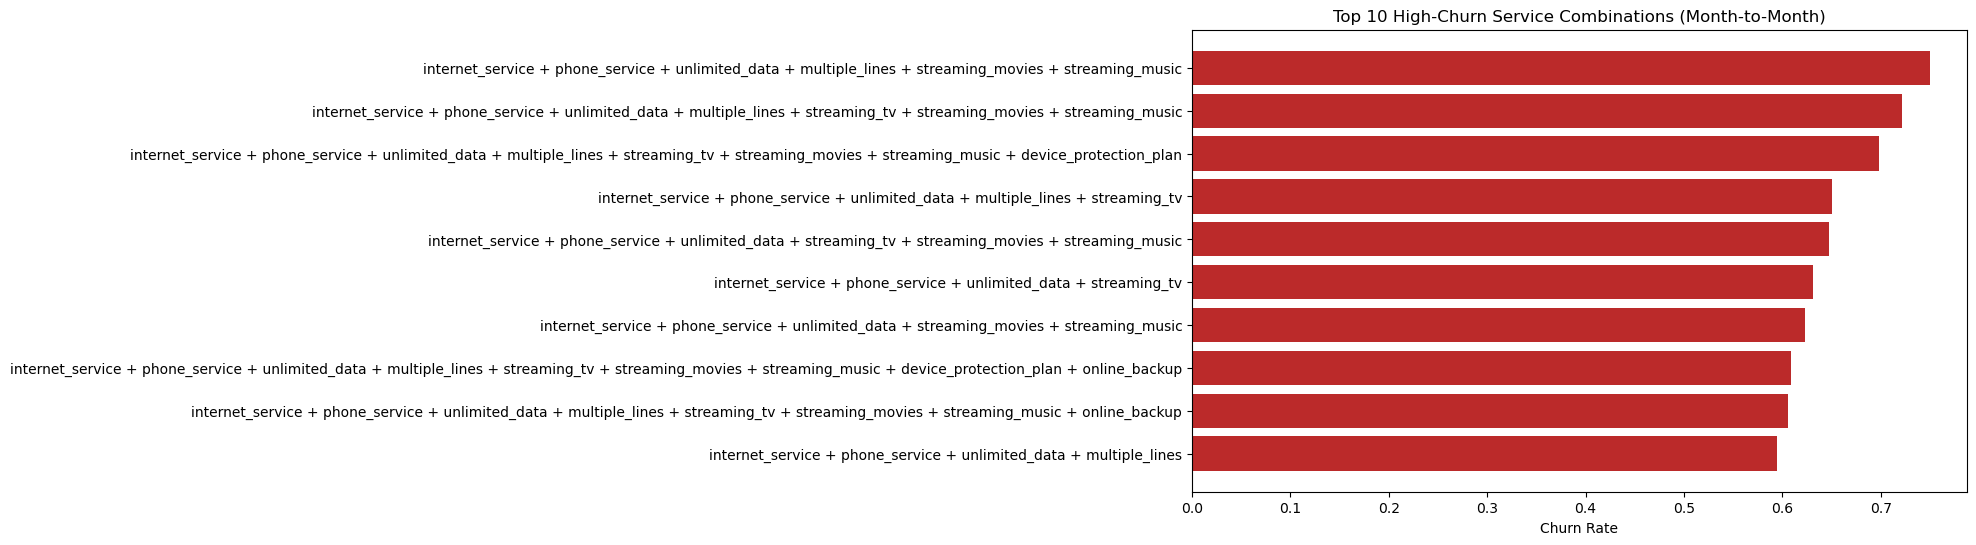

In [199]:
plt.figure(figsize=(10,6))
plt.barh(high_churn.index, high_churn["churn_rate"], color="#bb2a2a")
plt.title("Top 10 High-Churn Service Combinations (Month-to-Month)")
plt.xlabel("Churn Rate")
plt.gca().invert_yaxis()
plt.show()


- Top 10 Low Churn Lowest Bundles 

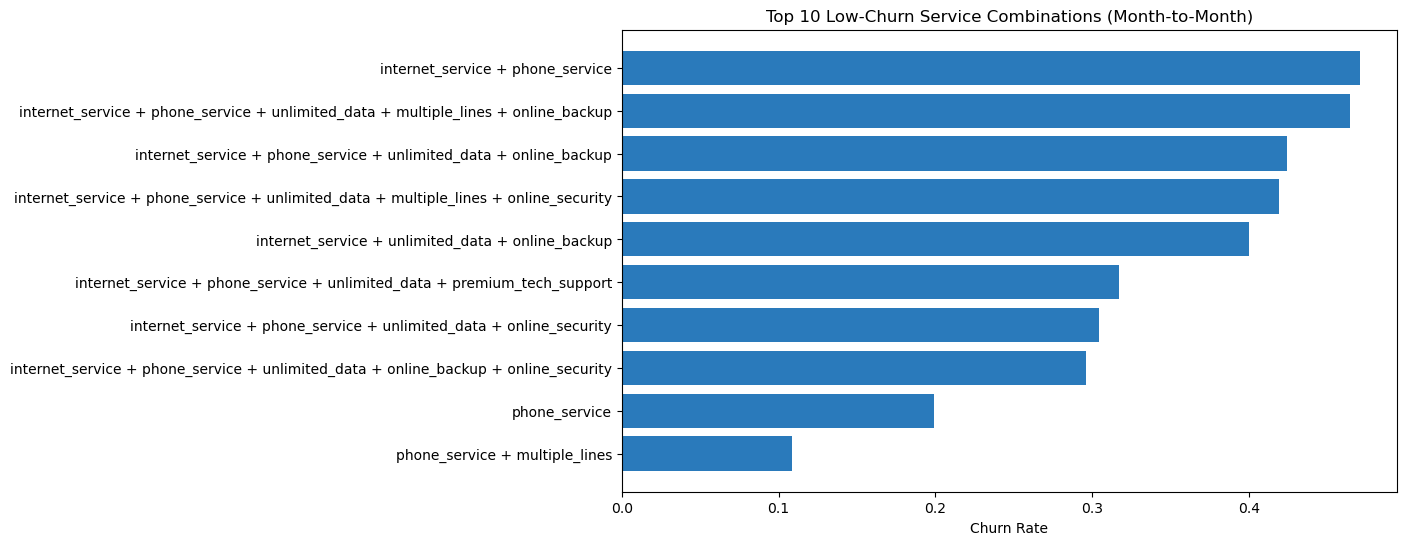

In [200]:
plt.figure(figsize=(10,6))
plt.barh(low_churn.index, low_churn["churn_rate"], color="#2a7abb")
plt.title("Top 10 Low-Churn Service Combinations (Month-to-Month)")
plt.xlabel("Churn Rate")
plt.gca().invert_yaxis()
plt.show()


In [202]:
internet_churn = mtm[mtm["internet_service"] == 1]["churn"].mean()
no_internet_churn = mtm[mtm["internet_service"] == 0]["churn"].mean()

print("Internet users churn rate:", internet_churn)
print("Non-internet users churn rate:", no_internet_churn)


Internet users churn rate: nan
Non-internet users churn rate: nan


## 4 Number of Customers by Contract Type

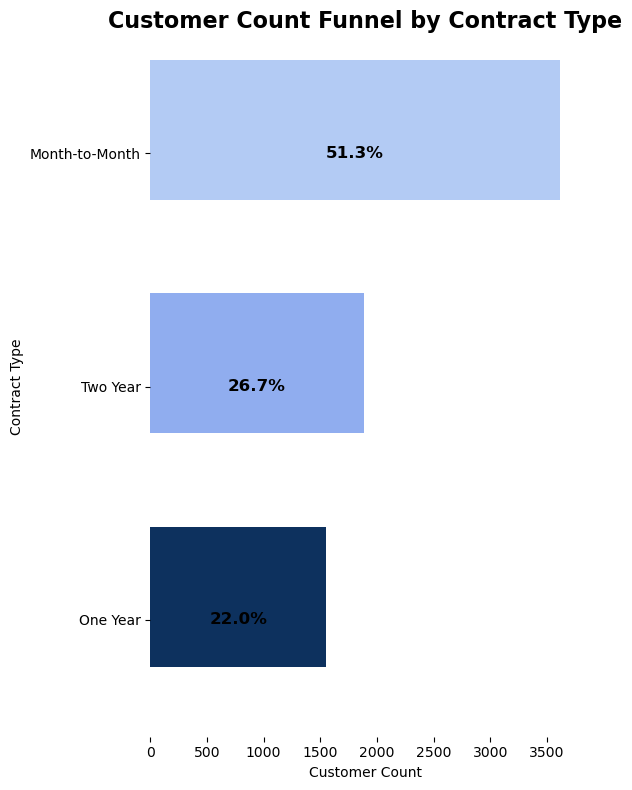

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
contract_counts = df["contract"].value_counts()
total_customers = contract_counts.sum()

# Create dataframe with percentages
funnel_df = (
    contract_counts.sort_values(ascending=False)
    .to_frame(name="count")
)
funnel_df["percentage"] = (funnel_df["count"] / total_customers * 100).round(1)

# Color palette
colors = ["#a8c8ff", "#80a7ff", "#002f6b"]

plt.figure(figsize=(6, 8))

# Horizontal bars for funnel
sns.barplot(
    x=funnel_df["count"],
    y=funnel_df.index,
    palette=colors
)

plt.title("Customer Count Funnel by Contract Type", fontsize=16, weight="bold")
plt.xlabel("Customer Count")
plt.ylabel("Contract Type")

# Remove grid
sns.despine(left=True, bottom=True)

# Adjust bar height to look more like a funnel
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    bar.set_height(0.6)

# Add percentage labels inside bars
for i, (count, pct) in enumerate(zip(funnel_df["count"], funnel_df["percentage"])):
    plt.text(
        count * 0.5,             # halfway inside the bar
        i,                       # bar position
        f"{pct}%",               # label
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        weight="bold"
    )

plt.tight_layout()
plt.show()


- Having the majority of our customers under M2M contracts makes the future unpredicatble as it is harder predict how much Revenue we'll get in the next few years as we have less recurring revenue. This could be a Mobile Virtual Network Operator that provide mobile phone services (talk, text, data) without owning their own network infrastructure (like cell towers). Instead, they lease network capacity in bulk from major Mobile Network Operators (MNOs) at wholesale rates and resell it under their own brand, often at lower prices. They Serve niche markets like budget travelers, seniors, local communities, price conscient groups.

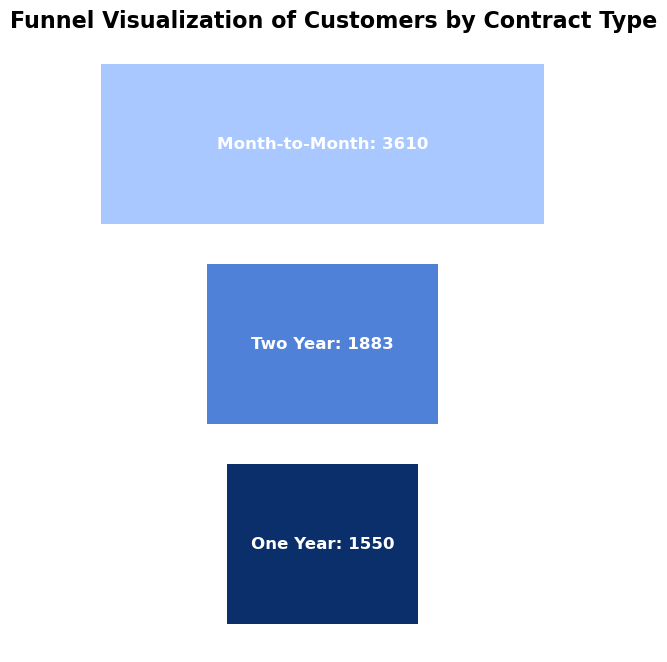

In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Data
counts = funnel_df.values
labels = funnel_df.index
colors = ["#a8c8ff", "#4f81d9", "#0b2f6b"]

plt.figure(figsize=(6,8))

max_width = counts.max()

for i, (value, label) in enumerate(zip(counts, labels)):
    width = value
    left = (max_width - width) / 2  # center the bar

    plt.barh(
        y=i,
        width=width,
        left=left,
        color=colors[i],
        edgecolor="none"
    )
    plt.text(
        x=max_width/2,
        y=i,
        s=f"{label}: {value}",
        va="center",
        ha="center",
        color="white",
        fontsize=12,
        weight="bold"
    )

plt.gca().invert_yaxis()   # Top = biggest group
plt.xticks([])
plt.yticks([])
plt.title("Funnel Visualization of Customers by Contract Type", fontsize=16, weight="bold")
plt.box(False)

plt.show()


## Step 4: Feature Engineering

4.1 Identify columns by type (categorical, numeric, binary)

In [ ]:
# 5.1 Identify column types

# Binary columns (Yes/No)
binary_cols = [c for c in df.columns if set(df[c].dropna().unique()) <= {"Yes","No"}]

# Categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols = [c for c in categorical_cols if c not in binary_cols + ["customer_id"]]

# Numeric columns
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ["churn"]]

print("Binary columns:", binary_cols)
print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)


Binary columns: ['under_30', 'senior_citizen', 'married', 'dependents', 'referred_a_friend', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'paperless_billing']
Categorical columns: ['gender', 'state', 'city', 'zip_code', 'offer', 'internet_type', 'contract', 'payment_method']
Numeric columns: ['age', 'number_of_dependents', 'latitude', 'longitude', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_long_distance_charges', 'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'satisfaction_score', 'population_x', 'population_y']


4.2 Convert binary Yes/No to 1/0

In [ ]:
# 5.2 Convert Yes/No features to 1/0 (binary encoding)
for col in binary_cols:
    df[col] = df[col].map({"Yes":1, "No":0})


4.3 Create tenure buckets

This captures the lifecycle effect we discovered earlier:

- high churn in first 6 months

- moderate 6–12

- stable 12–24

- very loyal 24+

In [ ]:
# 5.3 Tenure bucket feature
df["tenure_bucket"] = pd.cut(
    df["tenure_in_months"],
    bins=[0, 6, 12, 24, 48, 72],
    labels=["0-6","6-12","12-24","24-48","48-72"]
)


4.4 Create high_charge flag:

From the EDA:

- churn appears higher above ~80

- medium price (~40–70) is stable

- low price (<40) is loyal

In [ ]:
# 5.4 High charge risk flag
df["high_charge_flag"] = (df["monthly_charge"] > 80).astype(int)
df["mid_charge_flag"] = df["monthly_charge"].between(40, 80).astype(int)


4.5 Interaction features

We'l create the following features:

- fiber_high_charge

- low_tenure_fiber

- low_tenure_no_security

In [ ]:
# 5.5 Interaction features
df["fiber_high_charge"] = (
    (df["internet_type"] == "Fiber Optic") &
    (df["monthly_charge"] > 80)
).astype(int)

df["low_tenure_fiber"] = (
    (df["internet_type"] == "Fiber Optic") &
    (df["tenure_in_months"] < 6)
).astype(int)

df["low_tenure_no_security"] = (
    (df["tenure_in_months"] < 6) &
    (df["online_security"] == 0)
).astype(int)


-  We hope that these interactions will dramatically increase predictive power.

4.6 One-Hot Encode Categorical Columns

This includes:

- contract

- internet_type

- payment_method

- city

- state

- tenure_bucket

In [ ]:
# 5.6 One-hot encode categorical variables
df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols + ["tenure_bucket"],
    drop_first=True
)

df_encoded.shape


(7043, 2786)

- Our dataset now has 2786 features after the one hot encoding which is not desired. We probably have categorical columns with thousands of unique values..
Most likely:

- city

- latitude / longitude encoded as categories (should not be categorical!)

- zip_code

- or another column with very high cardinality

4.6.1 Identify which categorical columns caused the explosion

In [ ]:
for col in categorical_cols:
    print(col, df[col].nunique())

gender 2
state 1
city 1106
zip_code 1626
offer 5
internet_type 3
contract 3
payment_method 3


- City and Zip code caused the explosion and we should drop them because:

Although geographic churn analysis can be valuable in real telecommunications datasets (especially to detect remote regions with weak signal or competitive pressure), the city and zip_code fields in this dataset are synthetic, extremely high-cardinality, and unsupported by any network performance variables. We have 1,106 cities for 7,043 customers, on average only 6 customers per city which is a meaningless segmentation.
As a result, their churn rates would be statistically unreliable and non-actionable, and using them in modeling would introduce noise and overfitting rather than predictive signal.
Also we don't have network variables in dataset: 

- no signal strength

- no region infrastructure

- no outage logs

- no tower distance

- no competitor index

Therefore, city and zip_code will be excluded from feature engineering and modeling.

In [ ]:
df = df.drop(columns=["city", "zip_code", "state"])


In [ ]:
# Rebuild list of categorical variables (including tenure_bucket as 'category')
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Remove customer_id because we never encode it
categorical_cols = [c for c in categorical_cols if c != "customer_id"]

print("Categorical columns:", categorical_cols)



Categorical columns: ['gender', 'offer', 'internet_type', 'contract', 'payment_method', 'tenure_bucket']


In [111]:
df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)

print(df_encoded.shape)


(7043, 7073)


## Step 5: Train, Validation, Test Split

We’ll:

- Use churn as target

- Drop customer_id (identifier, not a feature)

Create:

- 60% train

- 20% validation

- 20% test

- Use stratified sampling so churn ratio stays consistent across splits.

In [ ]:
from sklearn.model_selection import train_test_split

# 6.1 Separate features and target
X = df_encoded.drop(columns=["churn", "customer_id"])
y = df_encoded["churn"]

print("Feature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts(normalize=True))


KeyError: "['churn'] not found in axis"

- Split into train + temp (val+test), then split temp into val & test

In [ ]:
# 6.2 Train / temp split (temp will be later split into val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,      # 40% goes to temp (val+test)
    stratify=y,
    random_state=42
)

# 6.3 Validation / test split (each 20% of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,      # half of temp -> 20% of total
    stratify=y_temp,
    random_state=42
)

print("Train shape:", X_train.shape, " | Churn mean:", y_train.mean())
print("Val shape:  ", X_val.shape,   " | Churn mean:", y_val.mean())
print("Test shape: ", X_test.shape,  " | Churn mean:", y_test.mean())


Train shape: (4225, 54)  | Churn mean: 0.26532544378698225
Val shape:   (1409, 54)  | Churn mean: 0.2654364797728886
Test shape:  (1409, 54)  | Churn mean: 0.2654364797728886


## Step 5: Modeling

5.1 Logistic Regression (Baseline)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

# 7.1 Logistic Regression with scaling inside a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

log_reg_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter=500,
        class_weight="balanced",
        n_jobs=-1,
        solver="lbfgs"
    ))
])

log_reg_clf.fit(X_train, y_train)

# Validation predictions
y_val_pred_lr = log_reg_clf.predict(X_val)
y_val_proba_lr = log_reg_clf.predict_proba(X_val)[:, 1]

print("=== Logistic Regression (Validation) ===")
print(classification_report(y_val, y_val_pred_lr, digits=3))
print("ROC-AUC:", roc_auc_score(y_val, y_val_proba_lr))
print("Confusion matrix:\n", confusion_matrix(y_val, y_val_pred_lr))


=== Logistic Regression (Validation) ===
              precision    recall  f1-score   support

           0      0.983     0.947     0.965      1035
           1      0.867     0.955     0.908       374

    accuracy                          0.949      1409
   macro avg      0.925     0.951     0.936      1409
weighted avg      0.952     0.949     0.950      1409

ROC-AUC: 0.992319615593273
Confusion matrix:
 [[980  55]
 [ 17 357]]


5.2 Random Forest (non-linear baseline)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

rf_clf.fit(X_train, y_train)

y_val_pred_rf = rf_clf.predict(X_val)
y_val_proba_rf = rf_clf.predict_proba(X_val)[:, 1]

print("=== Random Forest (Validation) ===")
print(classification_report(y_val, y_val_pred_rf, digits=3))
print("ROC-AUC:", roc_auc_score(y_val, y_val_proba_rf))
print("Confusion matrix:\n", confusion_matrix(y_val, y_val_pred_rf))


=== Random Forest (Validation) ===
              precision    recall  f1-score   support

           0      0.970     0.977     0.974      1035
           1      0.935     0.917     0.926       374

    accuracy                          0.961      1409
   macro avg      0.952     0.947     0.950      1409
weighted avg      0.961     0.961     0.961      1409

ROC-AUC: 0.9861117569557467
Confusion matrix:
 [[1011   24]
 [  31  343]]


- 5.3 Extracting Feature importance from both Logistic Regression (coefficients) and Random Forest (Gini importance)

- Because we used a pipeline + one-hot encoding, we need to rebuild the actual feature names used by the model.

In [70]:
# REBUILD state

# 1. X and y
X = df_encoded.drop(columns=["churn"])
y = df_encoded["churn"]

# 2. Train / validation / test splits
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    stratify=y,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)



KeyError: "['churn'] not found in axis"

In [77]:
encoded_cols = X_train.columns.tolist()
len(encoded_cols), encoded_cols[:20]


NameError: name 'X_train' is not defined